In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from datetime import datetime, timedelta

from collections import deque, namedtuple
# from create_dataset import CONVERT_INPUT
from utils import read_speed, preprocess_img, read_angle, angle_diff_norm
# from create_dataset import CONVERT_INPUT
CONVERT_INPUT = [[1, 0], [0, 1], [0, 0]]
CONVERT_INPUT = [[0, 0], [0, 1], [1, 0]]

In [42]:
SRC_PATH = 'H:/machine learning/NFSMW_v1/images/handmade'
TRACK_IDS = [i for i in range(18 , 34)]; TRACK_IDS.remove(26)
TRACK_IDS = [35]

In [27]:
def diff_angle_norm(this_angle, prev_angle):
    if np.abs(this_angle - prev_angle) > 180:
        if this_angle < 0:
            this_angle += 360
        else:
            prev_angle += 360
    return this_angle - prev_angle

In [44]:
kbs = []
angles = []
none_ctr = 0

Img = namedtuple('Img', 'content time speed angle kb_input')

TIME_OFFSET = 0.5
TIME_LIMIT = 5
queue =  []

for track_id in TRACK_IDS:
        # print(f'Starting {track_id}')
        angle_prev = 0
        for idx, img_name in enumerate(os.listdir(os.path.join(SRC_PATH, str(track_id)))):
            img = cv2.imread(os.path.join(SRC_PATH, str(track_id), img_name), cv2.IMREAD_GRAYSCALE)
            img = Img(  content=img, 
                        time=datetime.strptime(img_name[:-9], "%Y-%m-%d-%H-%M-%S-%f"),
                        speed=read_speed(img),
                        angle=read_angle(img),
                        kb_input = [int(key_pressed) for key_pressed in img_name[-8:-4]]
                        )

            queue.append(img)
            while img.time - queue[0].time > timedelta(seconds=TIME_LIMIT):
                queue.pop(0)
            if img.time - queue[0].time < timedelta(seconds=TIME_OFFSET):
                continue
            
            img = queue.pop(0)
            # DEBUG
            if img.angle is None:
                none_ctr += 1
            # END DEBUG
            future_angle = queue[-1].angle if queue[-1].angle is not None else future_angle
            this_angle = img.angle if img.angle is not None else future_angle
            angle_diff = diff_angle_norm(future_angle, this_angle)
            # print(img_time, kb_input[2:], angle_diff)

            kbs.append(CONVERT_INPUT.index(img.kb_input[2:])-1)
            angles.append(angle_diff)
            # plt.figure(figsize=(10, 10))
            # plt.imshow(img, cmap='gray')
            # plt.title(f'{kb_input}, {angle_diff}')
            # plt.xticks([]), plt.yticks([])
            # plt.show()
print(none_ctr, len(os.listdir(os.path.join(SRC_PATH, str(track_id)))))
np.corrcoef(kbs, angles)


88 1074


array([[1.        , 0.25781703],
       [0.25781703, 1.        ]])

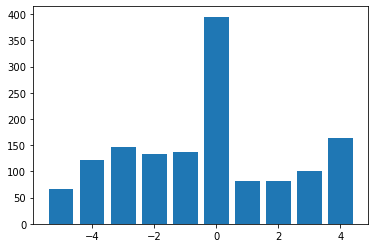

In [ ]:
y, x = np.histogram(angles)
plt.bar(x[:-1], y)
plt.show()